In [ ]:
from bs4 import BeautifulSoup
import requests

# ----------------------------finding last page-------------------
url_num = BeautifulSoup('http://www.nepalstock.com/main/floorsheet/index/0/','html.parser')
response_num = requests.get(url_num)
data_num = response_num.text
soup_num = BeautifulSoup(data_num,'lxml')

tags_num = soup_num.table
t = tags_num.find_all(title="Last Page")

p = []
for x in t:
    p.append(str(x))
    
str1=""
for ele in p:  
    str1 += ele   
l = str1.split(" ")
link= str(l[1])
link_li=link.split("/")
num= link_li[6]
f_num=int(num)
print("total fetched page ===",f_num)


# ------------------------------end of finding last page ------------------------
# ------------------------------Scraping And writing in csv file ------------------------
flag= 0
with open('stockmarketdata.csv','w') as csvFile:
print("Under scraping....")

    for i in range(f_num+1):
        
        url = BeautifulSoup('http://www.nepalstock.com/main/floorsheet/index/'+str(i)+'/','html.parser')

        response = requests.get(url)
        data = response.text
        soup = BeautifulSoup(data,'lxml')

        tags = soup.table
        tag = tags.find_all('tr')

        x = []
        for t in tag:
            x.append(t.get_text())
#         print(x)

        y =[]
        for l in x:
            list1 = l.split('\n')
            list2 = list1[3:len(list1)-2]
            y.append(list2)
        # print(y)
        if flag==0:
            y =y[1:-3]
            flag=1
        elif flag==1:
            y =y[2:-3]
            
       
        import csv
        xlen = len(y)
        # with open('stockmarketdata.csv','w') as csvFile:
        for i in range(xlen):
            writer = csv.writer(csvFile)
            writer.writerow(y[i])
csvFile.close()
print("Scraping Successful Completed!!")

# ------------------Scraping Completed---------------------------------
# -----------------------Data Visualizing-----------------------------




11962
[145.98611111111111, 202.36111111111111, 786.6086956521739, 811.4615384615385, 414.0365853658537, 127.92857142857143, 316.8421052631579, 261.0, 215.48837209302326, 400.93480176211455, 892.6774193548387, 762.2, 192.0, 425.5111111111111, 87.94117647058823, 348.97058823529414, 200.55, 878.2763157894736, 556.3333333333334, 369.0059523809524, 1233.3214285714287, 356.76785714285717, 183.55769230769232, 283.4769230769231, 102.73913043478261, 570.9473684210526, 70.21428571428571, 605.25, 224.36046511627907, 344.9714285714286, 574.8675213675214, 187.8181818181818, 1379.111111111111, 330.23809523809524, 8.780000000000001, 638.6774193548387, 1605.76, 752.125, 856.5833333333334, 184.82857142857142, 694.6, 1213.6, 289.625, 446.72222222222223, 450.92452830188677, 312.53125, 402.64516129032256, 8390.57142857143, 133.0, 310.7647058823529, 970.55, 406.21875, 135.03571428571428, 166.77777777777777, 607.6, 178.85416666666666, 331.7037037037037, 216.95833333333334, 1737.2727272727273, 414.6428571428

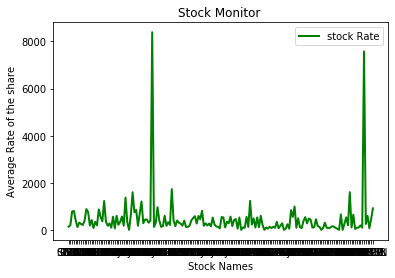

<Figure size 7200x7200 with 0 Axes>

In [13]:
from matplotlib import pyplot as plt
from statistics import mean 
import csv
li=[]
# Reading Csv fle data 
with open('stockmarketdata.csv', 'r') as f:
    reader = csv.reader(f)
    li= list(reader)

print (len(li))
final_list= []
# removing blank space from retrived data 
for i in range(len(li)):
    if i==0:
        final_list.append(li[i])
    elif i>0:
        if i%2==0:
            final_list.append(li[i])

data_dict={}

# format data_dict{'stock_symbol':[rate]}

for i in range(1, len(final_list)):
    
    if final_list[i][0] in data_dict:
        data_dict[final_list[i][0]].append(final_list[i][4])
    else:
        data_dict[final_list[i][0]] =[]
        data_dict[final_list[i][0]].append(final_list[i][4])
        
symbols=[]
rate=[]
# finding symbol from dictionary in the form of key and sock average rate
for key in data_dict.keys():
    symbols.append(key)
    for i in range(0, len(data_dict[key])): 
        data_dict[key][i] = float(data_dict[key][i]) 
    rate.append(mean(data_dict[key]))
        
print(rate)
print(symbols)
# Ploting the data in the




plt.plot(symbols,rate,'g',label='stock Rate', linewidth=2)

plt.title('Stock Monitor ')
plt.ylabel('Average Rate of the share')
plt.xlabel('Stock Names')
plt.legend()
# plt.grid()
plt.figure(figsize=(100,100))
plt.show()   
        

